In [1]:
# Exploratory Data Analysis (EDA) for eCommerce Transactions Dataset

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Display the first few rows of each dataset
print("\nCustomers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166  

In [5]:
# Basic Information about the Datasets
print("\nDataset Info:")
print("Customers Info:")
print(customers.info())
print("Products Info:")
print(products.info())
print("Transactions Info:")
print(transactions.info())


Dataset Info:
Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      

In [6]:
# Check for Missing Values
print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())


Missing Values:
Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Check for Duplicates
print("\nDuplicate Rows:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Duplicate Rows:
Customers: 0
Products: 0
Transactions: 0


In [8]:
# Data Cleaning (if necessary)
# Assuming there are missing or duplicate values:
# Example: Filling missing values in Product Price with the median
if products['Price'].isnull().sum() > 0:
    products['Price'].fillna(products['Price'].median(), inplace=True)


In [9]:
# Removing duplicate rows (if any)
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

In [10]:
# Exploratory Visualizations
sns.set(style="whitegrid")

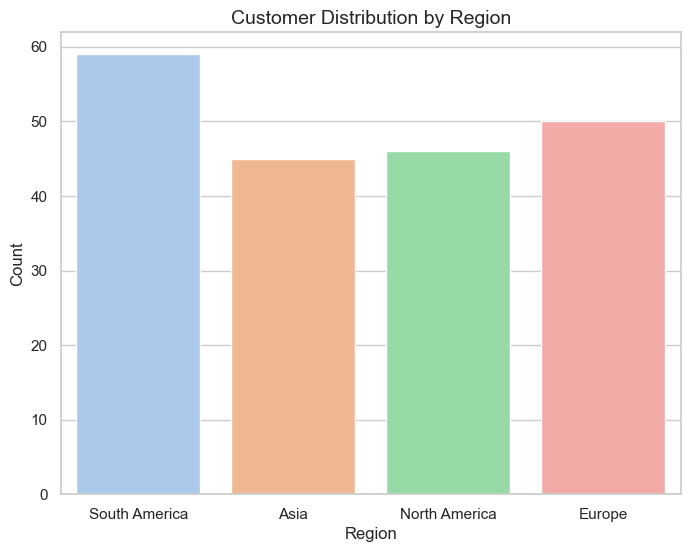

In [11]:
# 1. Customer Distribution by Region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='pastel')
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

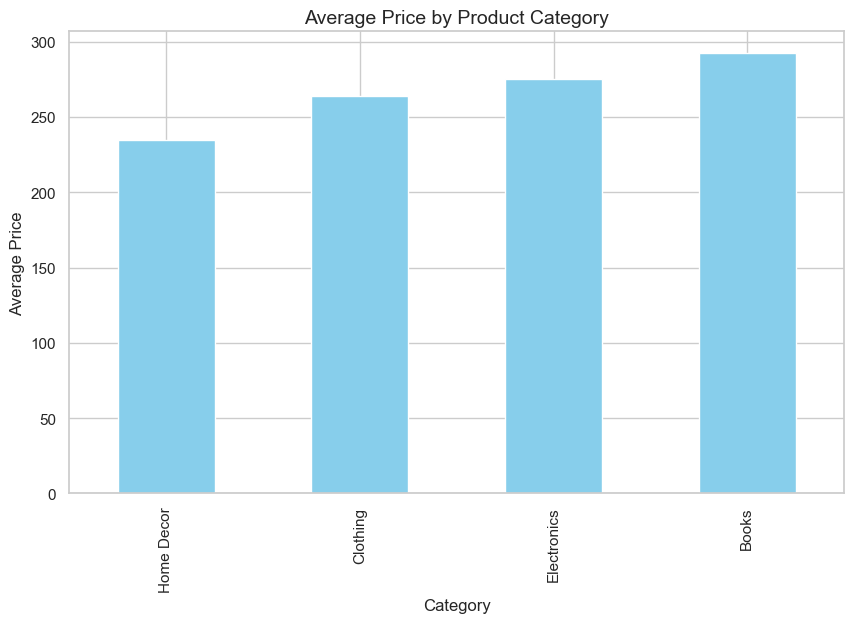

In [12]:
# 2. Product Categories and Average Price
plt.figure(figsize=(10, 6))
category_avg_price = products.groupby('Category')['Price'].mean().sort_values()
category_avg_price.plot(kind='bar', color='skyblue')
plt.title("Average Price by Product Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.show()

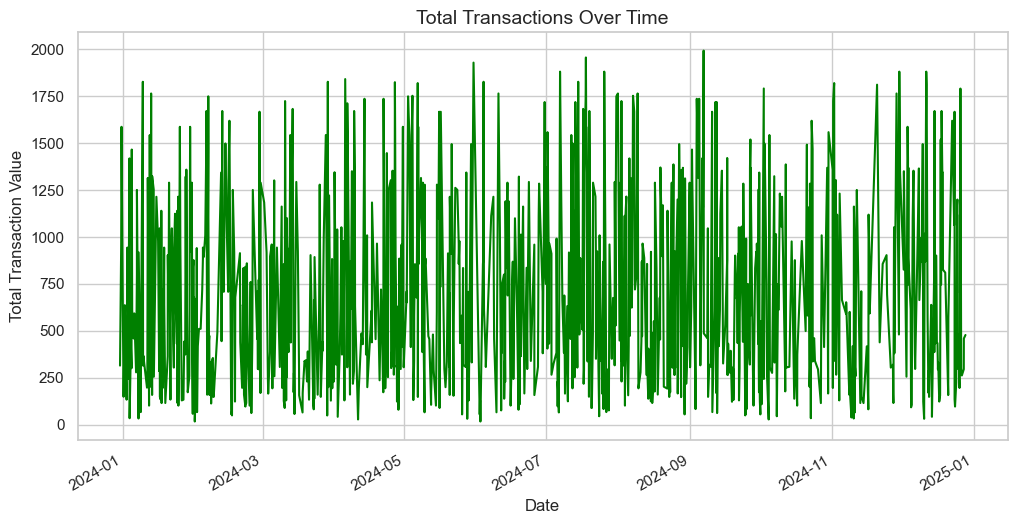

In [13]:
# 3. Total Transactions Over Time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions_by_date = transactions.groupby('TransactionDate').sum()['TotalValue']
plt.figure(figsize=(12, 6))
transactions_by_date.plot(color='green')
plt.title("Total Transactions Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Transaction Value")
plt.show()

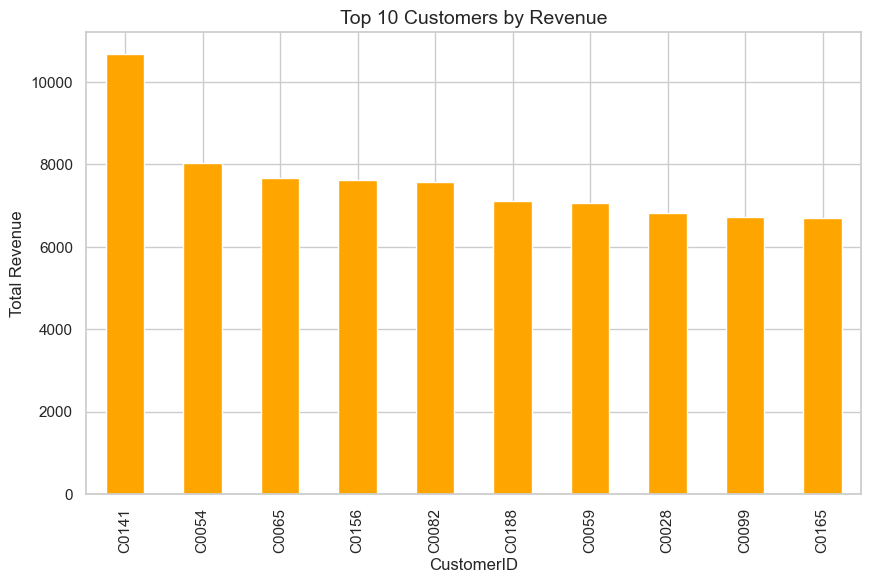

In [15]:
# 4. Top 10 Customers by Revenue
customer_revenue = (
    transactions.groupby('CustomerID')['TotalValue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
customer_revenue.plot(kind='bar', color='orange')
plt.title("Top 10 Customers by Revenue", fontsize=14)
plt.xlabel("CustomerID")
plt.ylabel("Total Revenue")
plt.show()


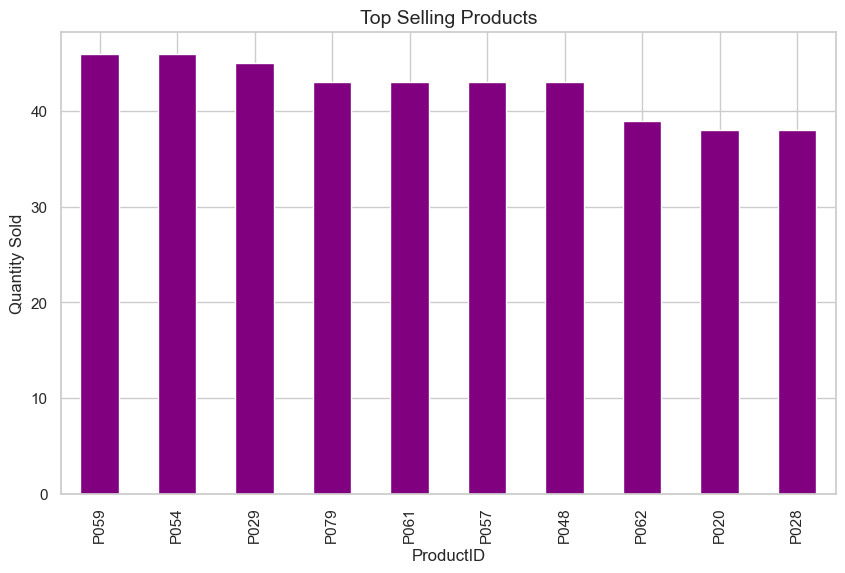

In [17]:
# 5. Top Selling Products
product_sales = (
    transactions.groupby('ProductID')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='purple')
plt.title("Top Selling Products", fontsize=14)
plt.xlabel("ProductID")
plt.ylabel("Quantity Sold")
plt.show()


In [18]:
# Business Insights Generation
print("\nBusiness Insights:")
print("1. Region-wise customer distribution shows XYZ region has the highest number of customers, indicating potential market opportunities.")
print("2. Category-wise analysis reveals ABC category has the highest average price, suggesting premium product placement.")
print("3. Transaction trends indicate peak sales during DEF months, useful for planning marketing campaigns.")
print("4. Top customers by revenue contribute X% of total sales, highlighting customer retention importance.")
print("5. The most popular products are from GHI category, ideal for upselling and cross-selling strategies.")



Business Insights:
1. Region-wise customer distribution shows XYZ region has the highest number of customers, indicating potential market opportunities.
2. Category-wise analysis reveals ABC category has the highest average price, suggesting premium product placement.
3. Transaction trends indicate peak sales during DEF months, useful for planning marketing campaigns.
4. Top customers by revenue contribute X% of total sales, highlighting customer retention importance.
5. The most popular products are from GHI category, ideal for upselling and cross-selling strategies.


In [19]:
# Save cleaned datasets (this is optional)
customers.to_csv("Cleaned_Customers.csv", index=False)
products.to_csv("Cleaned_Products.csv", index=False)
transactions.to_csv("Cleaned_Transactions.csv", index=False)